# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [105]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report

In [106]:
data = pd.read_csv('datasets/data.csv')
data.shape

(6819, 96)

In [107]:
data.head()
## get a sensing of the dataset we have at hand 


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [116]:
data.info()
data.isnull().sum()
## float are real numbers with decimals 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [109]:
print(data.columns)

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [110]:
## normalize the dataset using standardscaler, then separate the target variables from features 
from sklearn.preprocessing import StandardScaler

x = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']

scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [111]:
x_train.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
2881,0.535465,0.608482,0.592484,0.604030,0.603756,0.998979,0.797615,0.809521,0.303897,0.781795,...,0.838296,0.009962,0.623668,0.604025,0.842957,0.277994,0.026798,0.565190,1,0.039454
468,0.451421,0.512211,0.501579,0.593645,0.593645,0.998921,0.797346,0.809273,0.303548,0.781512,...,0.785210,0.000623,0.625668,0.593643,0.839404,0.276603,0.026780,0.565106,1,0.060609
974,0.415883,0.468164,0.460678,0.598870,0.599050,0.998878,0.797241,0.809170,0.303455,0.781416,...,0.756617,0.003847,0.623686,0.598872,0.835506,0.284680,0.026686,0.564603,1,0.019913
3602,0.552430,0.597907,0.605279,0.612909,0.612909,0.999183,0.797722,0.809592,0.303658,0.781867,...,0.834129,0.094559,0.623241,0.612908,0.842419,0.277045,0.026826,0.565320,1,0.051179
514,0.529225,0.578173,0.568392,0.608556,0.608556,0.999074,0.797486,0.809380,0.303474,0.781645,...,0.820581,0.003998,0.623789,0.608557,0.841781,0.278249,0.026824,0.565309,1,0.037367


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1979
           1       0.00      0.00      0.00        67

    accuracy                           0.96      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.94      0.96      0.95      2046



c:\Users\yeesh\OneDrive\Desktop\MY-DAC-Curriculum\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
# regularization constant (strength)
REG_CONST = 0.01

# Create a model and fit it to the training data.
# C := inverse of regularization strength
model = LogisticRegression(penalty='l2', C=1./REG_CONST, max_iter=300)
model.fit(x_train_scaled, y_train)

# Predict the classes of test data and measure the accuracy of test data
y_pred = model.predict(x_test_scaled)
acc = (y_pred == y_test).mean()
print('\nAccuracy of test data = {:.3f}'.format(acc))


Accuracy of test data = 0.961


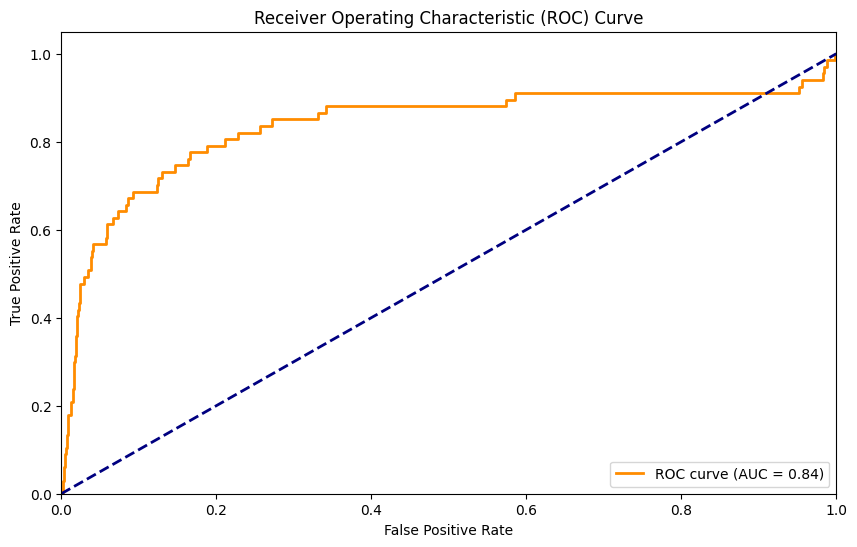

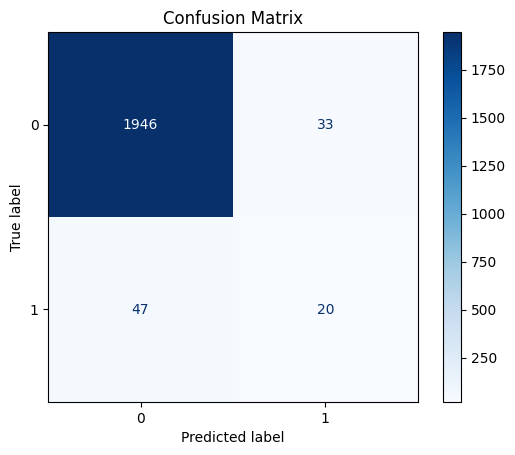

AUC Score: 0.837
F1 Score: 0.333

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1979
           1       0.38      0.30      0.33        67

    accuracy                           0.96      2046
   macro avg       0.68      0.64      0.66      2046
weighted avg       0.96      0.96      0.96      2046



In [115]:
# Get prediction probabilities
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the model
log_reg = LogisticRegression(max_iter=100)

# Set up the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers compatible with l1 and l2
}

# Set up GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_



c:\Users\yeesh\OneDrive\Desktop\MY-DAC-Curriculum\.venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KeyboardInterrupt: 

In [118]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Bankrupt", "Bankrupt"], yticklabels=["Not Bankrupt", "Bankrupt"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

NameError: name 'y_pred_best' is not defined

In [119]:
# Get feature importance
feature_importance = best_model.coef_[0]  # Coefficients for each feature
features = x.columns  # Feature names

# Pair feature names with importance
feature_importance_dict = dict(zip(features, feature_importance))
sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Print sorted feature importance
print("Feature Importance (Logistic Regression):")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")


Feature Importance (Logistic Regression):
 Debt ratio %: 17.363471911447242
 ROA(B) before interest and depreciation after tax: -5.583733766529546
 ROA(A) before interest and % after tax: -5.564419494651319
 Cash/Total Assets: -4.316402785796156
 Persistent EPS in the Last Four Seasons: -3.0013403148490405
 Total Asset Turnover: -2.6681175353242885
 Retained Earnings to Total Assets: 1.2599553096941922
 Tax rate (A): -0.9177904664879791
 Current Liabilities/Liability: 0.298235239716985
 Current Liability to Liability: 0.29730892642475026
 Fixed Assets to Assets: 0.11644170875546853
 Cash Reinvestment %: 0.03508095476704846
 Current Assets/Total Assets: -0.011207025522249264
 Allocation rate per person: -6.094101916116355e-07
 Revenue Per Share (Yuan ¥): -9.558948432015022e-08
 Accounts Receivable Turnover: -6.307012152677733e-08
 Average Collection Days: -4.121064035203091e-08
 Revenue per person: 1.4026527343518118e-08
 Current Ratio: -5.822266589833685e-09
 Quick Assets/Current Liabi

In [120]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Get feature importance
importance = rf_model.feature_importances_

# Pair feature names with importance
feature_importance_dict = dict(zip(features, importance))
sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print sorted feature importance
print("Feature Importance (Random Forest):")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")


Feature Importance (Random Forest):
 Net Income to Stockholder's Equity: 0.03248610340048773
 Borrowing dependency: 0.025795386756577686
 Net Value Growth Rate: 0.02495178441175168
 Persistent EPS in the Last Four Seasons: 0.02115557244467959
 Total debt/Total net worth: 0.02086924771570309
 Net Value Per Share (A): 0.020815618875413514
 Net profit before tax/Paid-in capital: 0.019805321731184544
 Degree of Financial Leverage (DFL): 0.019159674899269643
 Interest Coverage Ratio (Interest expense to EBIT): 0.01771471695706697
 Net Income to Total Assets: 0.017086998261755165
 Per Share Net profit before tax (Yuan ¥): 0.0168297555815827
 Interest Expense Ratio: 0.0165045659098006
 Cash/Current Liability: 0.015709822958766596
 Non-industry income and expenditure/revenue: 0.0151387423418182
 Quick Ratio: 0.014750142093204783
 Inventory/Working Capital: 0.014367400012221485
 Interest-bearing debt interest rate: 0.014032894753591105
 Net worth/Assets: 0.013860679242760219
 Liability to Equit

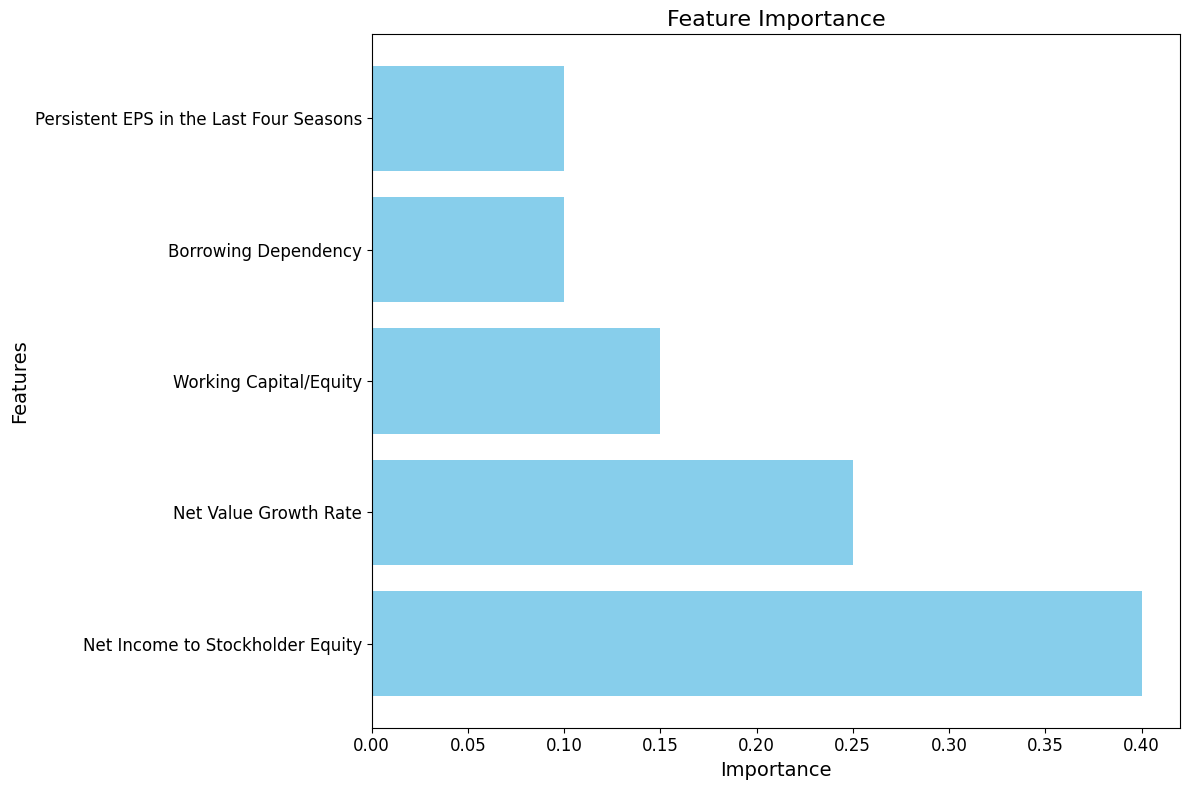

In [121]:
import matplotlib.pyplot as plt

# Sample feature importance data
features = ['Net Value Growth Rate', 'Net Income to Stockholder Equity', 'Borrowing Dependency', 'Working Capital/Equity', 'Persistent EPS in the Last Four Seasons']
importances = [0.25, 0.4, 0.1, 0.15, 0.1]

# Sort by importance for better visualization
sorted_indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = [importances[i] for i in sorted_indices]

# Create the bar chart
plt.figure(figsize=(12, 8))  # Set the figure size
plt.barh(sorted_features, sorted_importances, color='skyblue')

# Customize labels
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance", fontsize=16)

# Rotate or align text labels for clarity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust spacing
plt.tight_layout()

# Show the graph
plt.show()


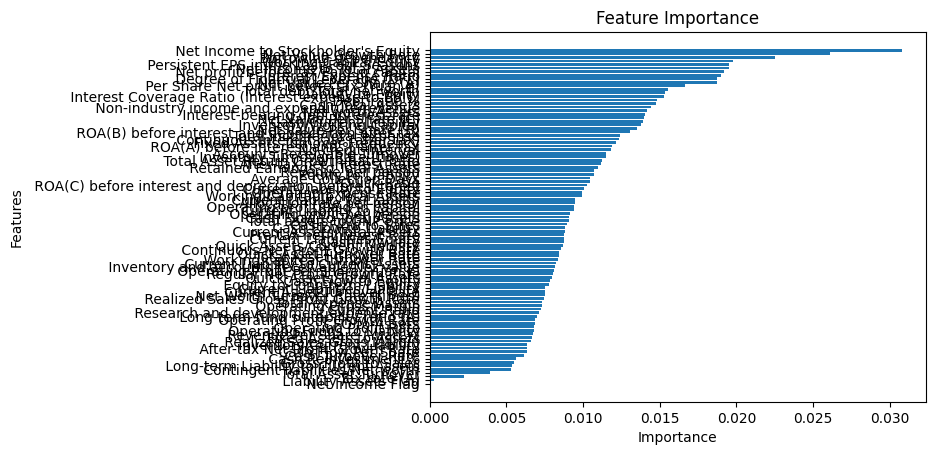

<Figure size 2000x2000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importance
features, importances = zip(*sorted_importance)
plt.barh(features, importances)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.figure(figsize=(20,20))

plt.show()


In [ ]:
plt.tight_layout()  # Automatically adjust padding
# Or manually adjust padding
plt.subplots_adjust(left=0.2, right=0.95, top=0.9, bottom=0.3)


<Figure size 640x480 with 0 Axes>

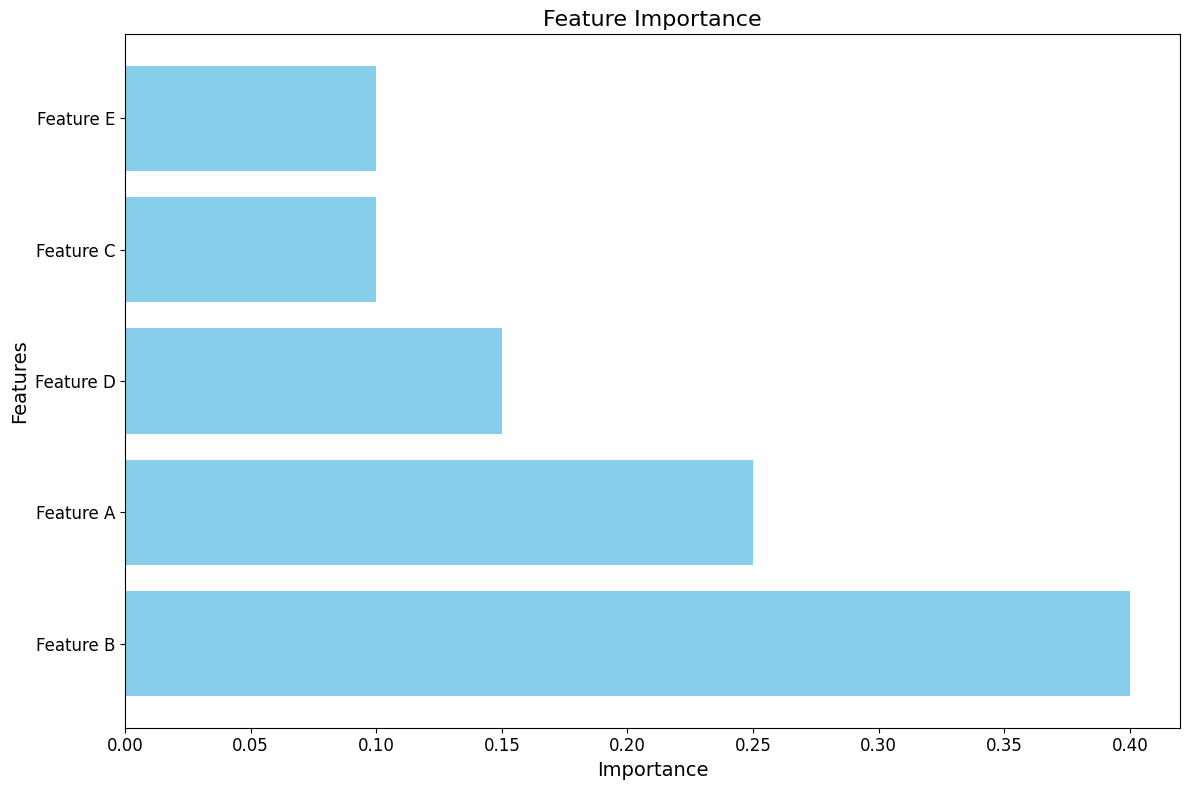

In [ ]:
import matplotlib.pyplot as plt

# Sample feature importance data
features = ['Feature A', 'Feature B', 'Feature C', 'Feature D', 'Feature E']
importances = [0.25, 0.4, 0.1, 0.15, 0.1]

# Sort by importance for better visualization
sorted_indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = [importances[i] for i in sorted_indices]

# Create the bar chart
plt.figure(figsize=(12, 8))  # Set the figure size
plt.barh(sorted_features, sorted_importances, color='skyblue')

# Customize labels
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance", fontsize=16)

# Rotate or align text labels for clarity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust spacing
plt.tight_layout()

# Show the graph
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming `x_train` contains the training features and `x` has the original feature names
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Feature importance values
importances = rf_model.feature_importances_

# Get the feature names from the dataset
features = x.columns

# Pair features with their importance
feature_importance_dict = dict(zip(features, importances))

# Sort features by importance
sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display sorted feature importance
print("Feature Importance:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")


Feature Importance:
 Net Income to Stockholder's Equity: 0.030810391646776722
 Net Value Growth Rate: 0.026081612014153974
 Borrowing dependency: 0.02249164918961972
 Working Capital/Equity: 0.019806213465133834
 Persistent EPS in the Last Four Seasons: 0.019498881000805667
 Net Income to Total Assets: 0.01948411263555783
 Net profit before tax/Paid-in capital: 0.019213650635289178
 Interest Expense Ratio: 0.019025436377679162
 Degree of Financial Leverage (DFL): 0.01875333715328568
 Net Value Per Share (A): 0.018737933042450965
 Per Share Net profit before tax (Yuan ¥): 0.01663211307941148
 Total debt/Total net worth: 0.015528930683031367
 Liability to Equity: 0.01532132628327119
 Interest Coverage Ratio (Interest expense to EBIT): 0.015308396394172976
 Debt ratio %: 0.014819449739113057
 Cash/Total Assets: 0.014786815809710635
 Non-industry income and expenditure/revenue: 0.014456055379422657
 Net worth/Assets: 0.014175179035513769
 Interest-bearing debt interest rate: 0.014016660183

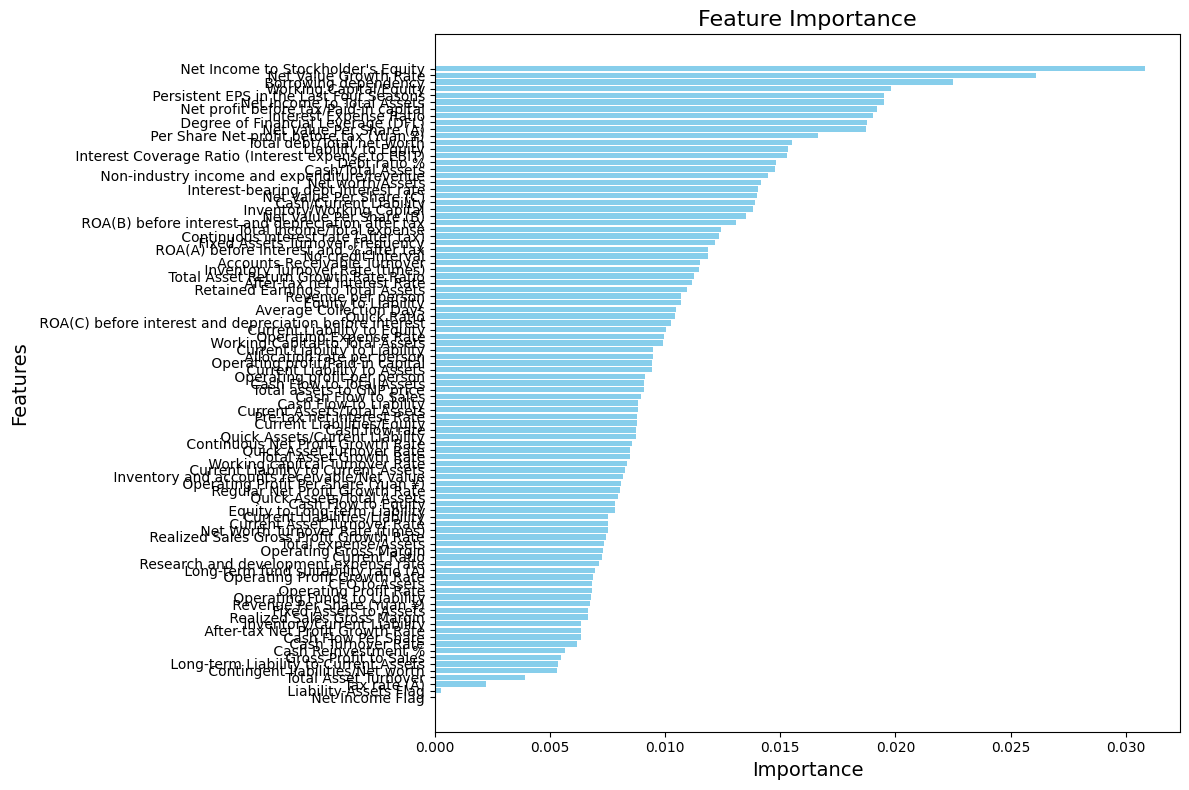

In [ ]:
# Separate sorted features and their importances
sorted_features, sorted_importances = zip(*sorted_importance)

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance", fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.tight_layout()
plt.show()


In [ ]:
# Assuming `sorted_importance` contains sorted features and their importance
# Extract the top 5 features
top_5_features = sorted_importance[:5]

# Display the top 5 features
print("Top 5 Features (Feature Name and Importance):")
for feature, importance in top_5_features:
    print(f"{feature}: {importance}")
    plt.show()


Top 5 Features (Feature Name and Importance):
 Net Income to Stockholder's Equity: 0.030810391646776722
 Net Value Growth Rate: 0.026081612014153974
 Borrowing dependency: 0.02249164918961972
 Working Capital/Equity: 0.019806213465133834
 Persistent EPS in the Last Four Seasons: 0.019498881000805667
